In [1]:
import pandas as pd
df_demo = pd.read_csv("Demographic.csv")
print(df_demo.head())


   Age  Gender    Income  Location Ad Type Ad Topic   Ad Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click Time  Conversion Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.898459           0.0937  0.0592  
2  2024-02-24 20:45:56.898459           0.1912  0.0563  
3  2023-12-13 20:45:56.898459           0.1122  0.0232  
4  2023-07-02 20:45:56.898459           0.1426  0.0539  


In [2]:
# Check for missing values in each column
print(df_demo.isnull().sum())


Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
Ad Placement       0
Clicks             0
Click Time         0
Conversion Rate    0
CTR                0
dtype: int64


In [3]:
# Check data types to identify categorical and numerical features
print(df_demo.dtypes)


Age                  int64
Gender              object
Income             float64
Location            object
Ad Type             object
Ad Topic            object
Ad Placement        object
Clicks               int64
Click Time          object
Conversion Rate    float64
CTR                float64
dtype: object


In [4]:
# List of categorical columns
categorical_columns = ['Gender', 'Location', 'Ad Type', 'Ad Topic', 'Ad Placement']

# Print unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in {col}: {df_demo[col].unique()}")


Unique values in Gender: ['Male' 'Female' 'Other']
Unique values in Location: ['Urban' 'Rural' 'Suburban']
Unique values in Ad Type: ['Banner' 'Video' 'Text' 'Native']
Unique values in Ad Topic: ['Travel' 'Food' 'Health' 'Fashion' 'Technology' 'Finance']
Unique values in Ad Placement: ['Social Media' 'Search Engine' 'Website']


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
# Convert Click Time to datetime format
df_demo['Click Time'] = pd.to_datetime(df_demo['Click Time'])
df_demo['Click Time']

0      2024-01-18 20:45:56.898459
1      2023-04-24 20:45:56.898459
2      2024-02-24 20:45:56.898459
3      2023-12-13 20:45:56.898459
4      2023-07-02 20:45:56.898459
                  ...            
9995   2023-05-31 20:45:56.927349
9996   2023-09-01 20:45:56.927349
9997   2023-11-15 20:45:56.927349
9998   2023-05-23 20:45:56.927349
9999   2023-11-21 20:45:56.927349
Name: Click Time, Length: 10000, dtype: datetime64[ns]

In [7]:
# Encode Gender (Binary: Male/Female/Other) using Label Encoding
label_encoder = LabelEncoder()
df_demo['Gender'] = label_encoder.fit_transform(df_demo['Gender'])

df_demo['Gender']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [8]:
# One-Hot Encoding for categorical variables
categorical_columns = ['Location', 'Ad Type', 'Ad Topic', 'Ad Placement']
df_demo = pd.get_dummies(df_demo, columns=categorical_columns, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Income', 'Clicks', 'CTR', 'Conversion Rate']
df_demo[numerical_columns] = scaler.fit_transform(df_demo[numerical_columns])

In [9]:
print(df_demo.head())

        Age  Gender    Income    Clicks                 Click Time  \
0  1.809654       1 -0.720478 -0.899318 2024-01-18 20:45:56.898459   
1  0.457390       1 -0.131769 -0.013552 2023-04-24 20:45:56.898459   
2  0.998295       0  0.905265 -0.456435 2024-02-24 20:45:56.898459   
3  2.282946       0  0.727655  0.429331 2023-12-13 20:45:56.898459   
4  1.944880       1 -1.453267 -0.013552 2023-07-02 20:45:56.898459   

   Conversion Rate       CTR  Location_Suburban  Location_Urban  \
0        -0.860082  1.174351              False            True   
1        -0.896419  0.442756              False           False   
2        -0.091220  0.296436              False           False   
3        -0.743638 -1.373619               True           False   
4        -0.492581  0.175345              False            True   

   Ad Type_Native  Ad Type_Text  Ad Type_Video  Ad Topic_Finance  \
0           False         False          False             False   
1           False         False         

## Exploratory Data Analysis 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")


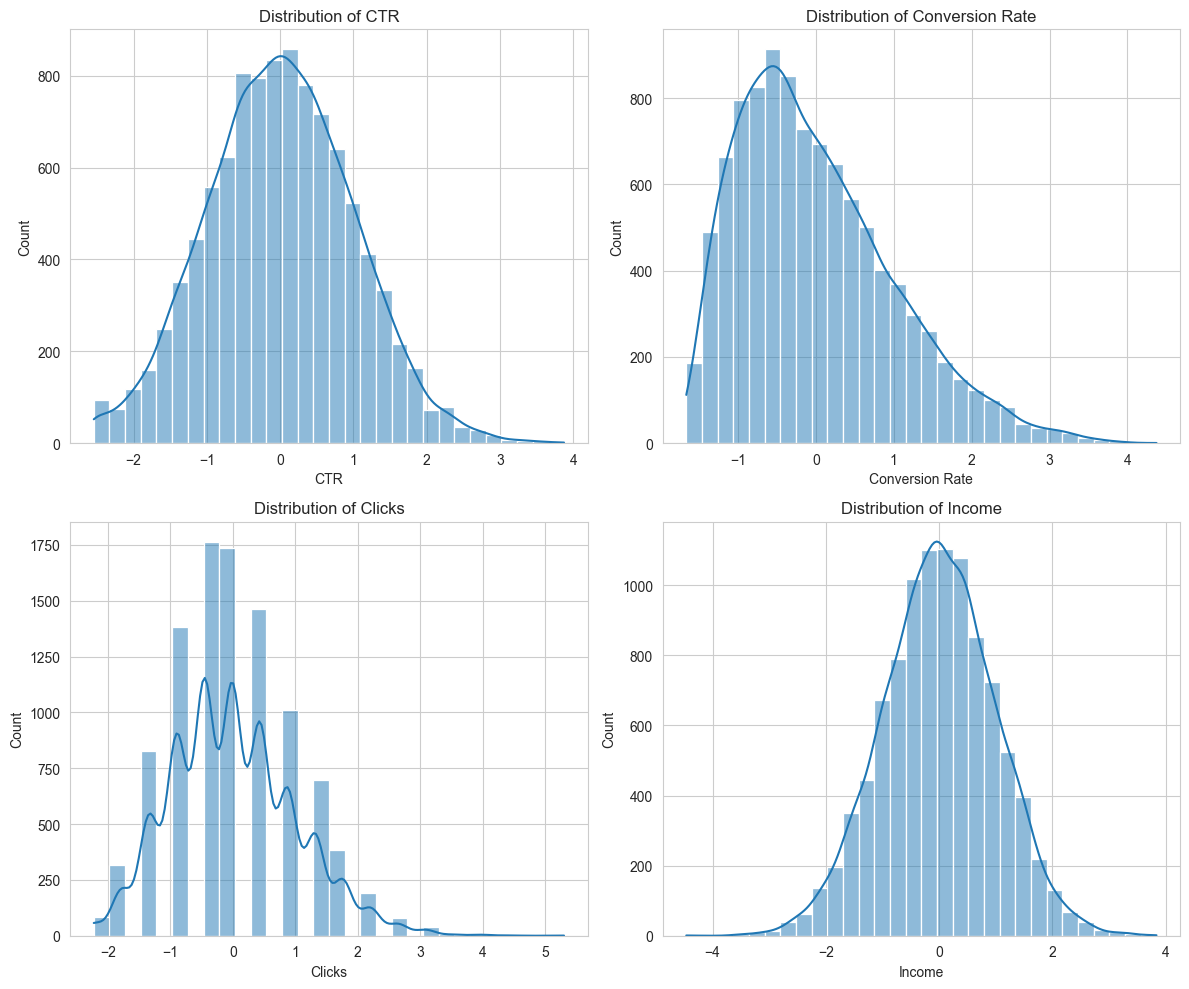

In [11]:
# Create subplots for numerical feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for CTR
sns.histplot(df_demo['CTR'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of CTR")

# Histogram for Conversion Rate
sns.histplot(df_demo['Conversion Rate'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Conversion Rate")

# Histogram for Clicks
sns.histplot(df_demo['Clicks'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Clicks")

# Histogram for Income
sns.histplot(df_demo['Income'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Income")

# Adjust layout
plt.tight_layout()
plt.show()



1. **CTR (Click-Through Rate) Distribution:**
   - Looks **roughly normal**, slightly skewed to the right.
   - Indicates **most users have an average CTR**, but a few click significantly more.

2. **Conversion Rate Distribution:**
   - **Right-skewed** (many users have a low conversion rate, with a few high converters).
   - Suggests **most users don’t convert easily**.

3. **Clicks Distribution:**
   - Appears **multimodal**, meaning different groups of users have different click behaviors.
   - Some users click frequently, while others rarely interact with ads.

4. **Income Distribution:**
   - **Normally distributed**, indicating a **balanced representation of income levels**.
   - Useful for analyzing whether income influences ad engagement.


#### Now we will analyze CTR and Conversion Rate trends by categorical variables

In [12]:
print(df_demo.columns)


Index(['Age', 'Gender', 'Income', 'Clicks', 'Click Time', 'Conversion Rate',
       'CTR', 'Location_Suburban', 'Location_Urban', 'Ad Type_Native',
       'Ad Type_Text', 'Ad Type_Video', 'Ad Topic_Finance', 'Ad Topic_Food',
       'Ad Topic_Health', 'Ad Topic_Technology', 'Ad Topic_Travel',
       'Ad Placement_Social Media', 'Ad Placement_Website'],
      dtype='object')


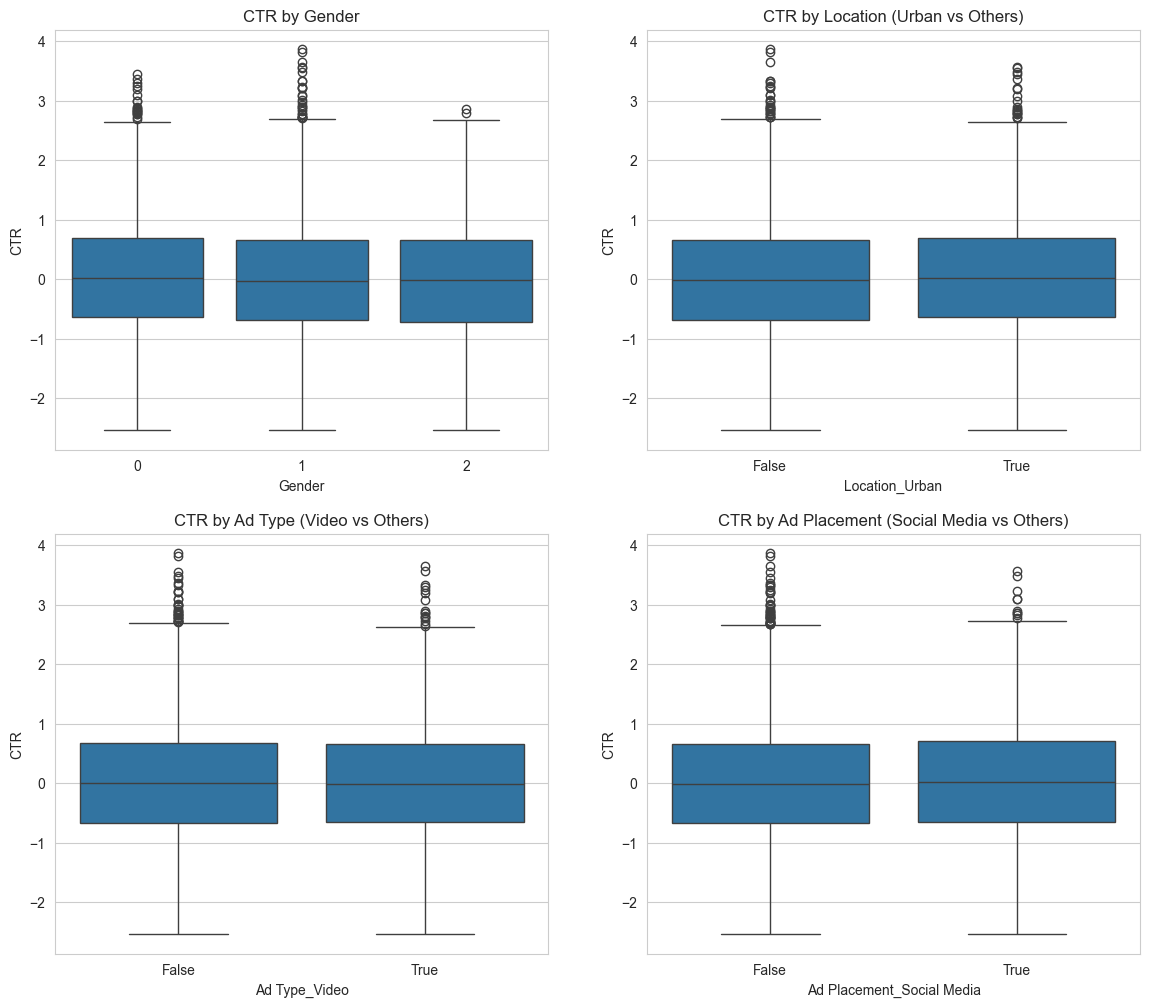

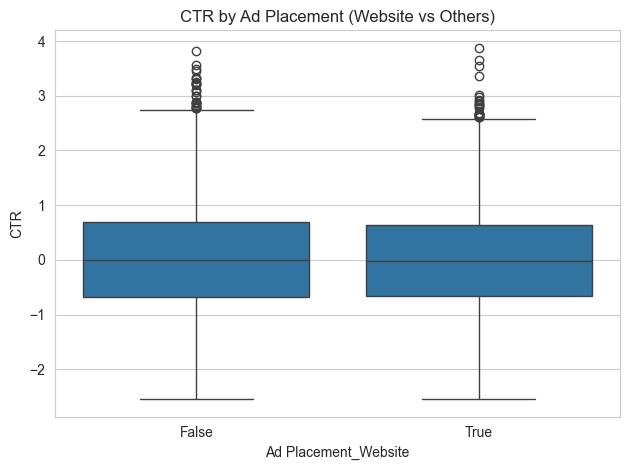

In [13]:
# Create subplots for categorical comparisons
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# CTR by Gender
sns.boxplot(x=df_demo['Gender'], y=df_demo['CTR'], ax=axes[0, 0])
axes[0, 0].set_title("CTR by Gender")

# CTR by Location
sns.boxplot(x=df_demo['Location_Urban'], y=df_demo['CTR'], ax=axes[0, 1])
axes[0, 1].set_title("CTR by Location (Urban vs Others)")

# CTR by Ad Type
sns.boxplot(x=df_demo['Ad Type_Video'], y=df_demo['CTR'], ax=axes[1, 0])
axes[1, 0].set_title("CTR by Ad Type (Video vs Others)")

# CTR by Ad Placement (Social Media vs Others)
sns.boxplot(x=df_demo['Ad Placement_Social Media'], y=df_demo['CTR'])
plt.title("CTR by Ad Placement (Social Media vs Others)")
plt.show()

# CTR by Ad Placement (Website vs Others)
sns.boxplot(x=df_demo['Ad Placement_Website'], y=df_demo['CTR'])
plt.title("CTR by Ad Placement (Website vs Others)")

# Adjust layout
plt.tight_layout()
plt.show()



**1️. CTR by Gender**
- No significant differences in CTR across **Male, Female, and Other**.
- The **median CTR is similar** across all gender categories.
- Some **outliers** suggest that certain users have unusually high engagement.

**2️. CTR by Location (Urban vs Others)**
- The **CTR distribution is quite similar** for Urban vs. non-Urban users.
- Urban users **may have a slightly higher median CTR**, but the difference is small.
- High **variance** in CTR suggests that location alone isn’t a strong predictor.

**3️. CTR by Ad Type (Video vs Others)**
- **Video ads have a similar median CTR** to other ad types.
- A few **high-performing outliers** indicate that video ads work better for some users.
- Suggests that **Ad Type alone** may not be the biggest factor influencing CTR.

**4️. CTR by Ad Placement (Social Media vs Others)**
- **CTR is nearly identical for Social Media vs. non-Social Media** placements.
- Some **outliers with very high CTR** suggest certain campaigns perform better on social platforms.

**5️. CTR by Ad Placement (Website vs Others)**
- **CTR on Websites is similar to other placements**.
- Suggests that **Website ads don’t perform significantly worse or better than other placements**.

---

**Key Takeaways**
1. **CTR does not significantly vary by Gender, Location, or Ad Placement**.
2. **Some users (outliers) have much higher CTR**, suggesting personal factors (like interest in a topic) might be more important than demographics.
3. **Ad Type (Video vs. Others) and Placement (Social Media vs. Website) have minimal impact on CTR**.



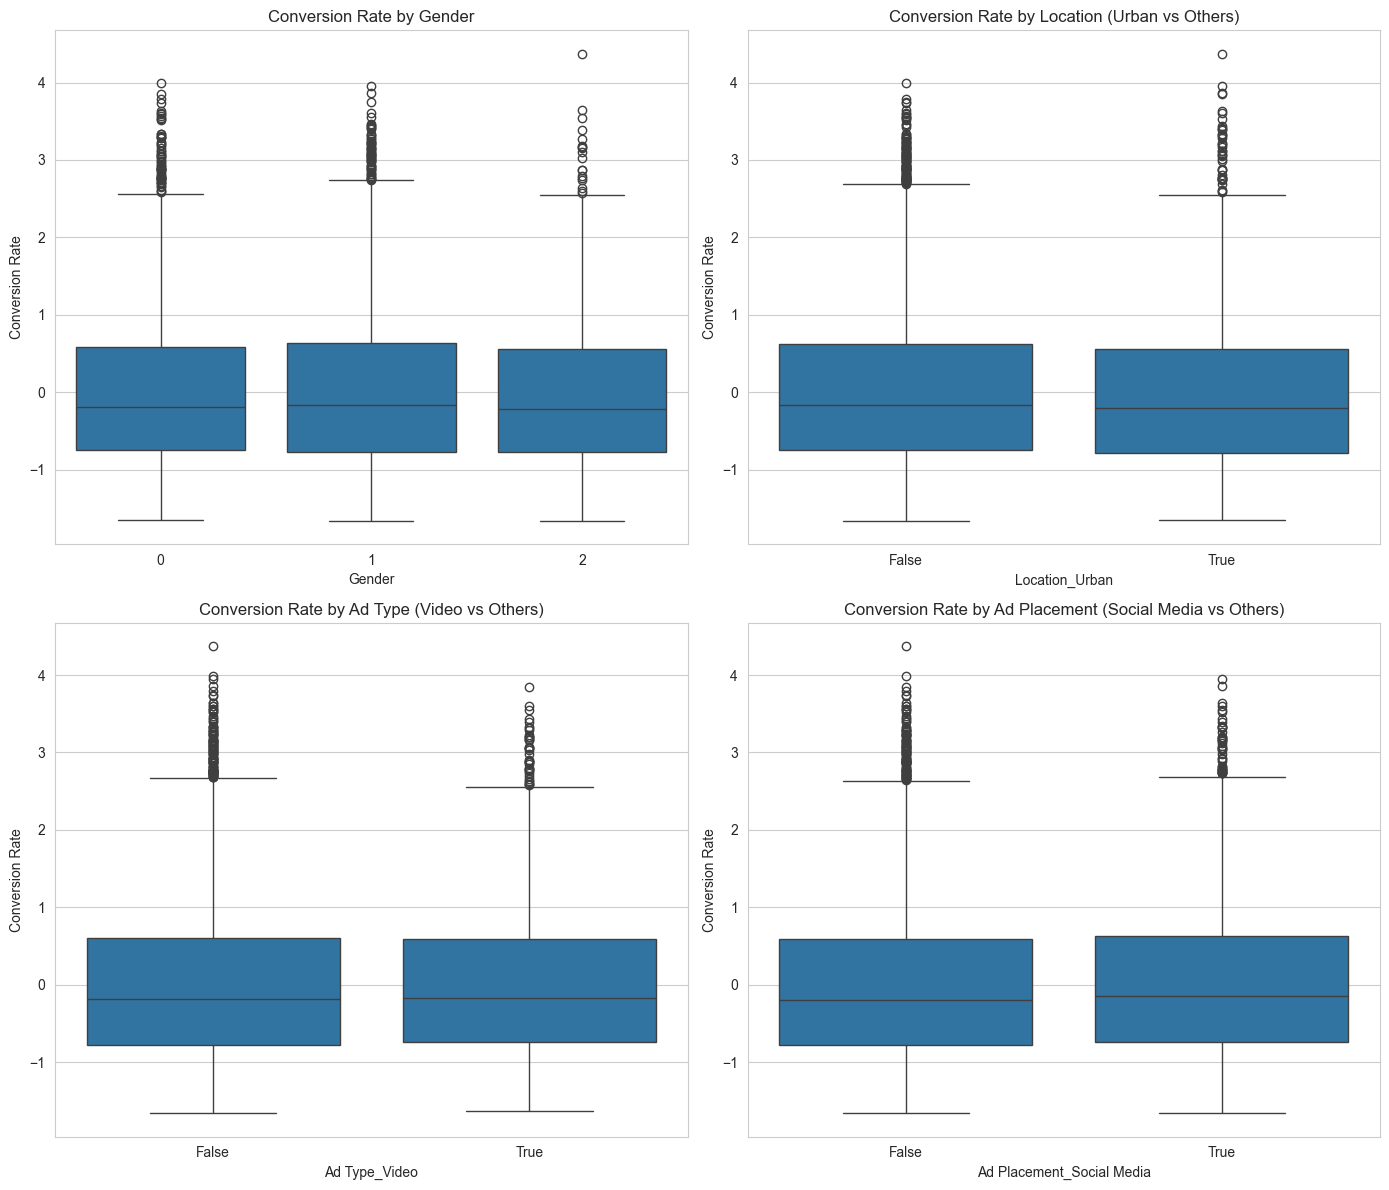

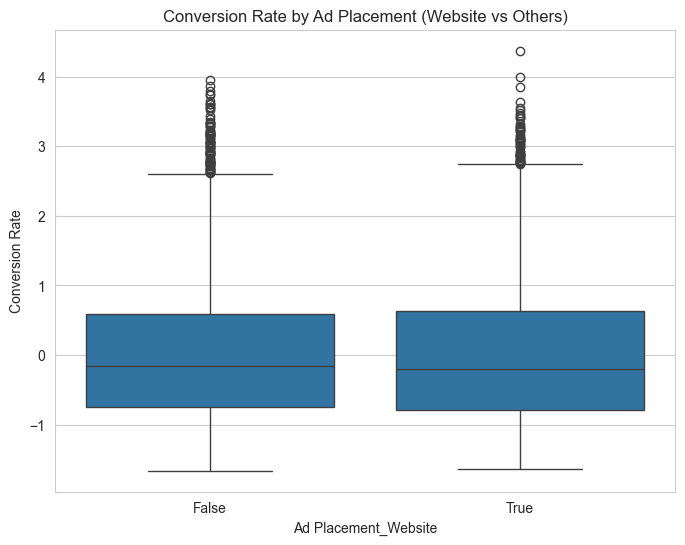

In [14]:
# Create subplots for Conversion Rate trends across different categories
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Conversion Rate by Gender
sns.boxplot(x=df_demo['Gender'], y=df_demo['Conversion Rate'], ax=axes[0, 0])
axes[0, 0].set_title("Conversion Rate by Gender")

# Conversion Rate by Location (Urban vs Others)
sns.boxplot(x=df_demo['Location_Urban'], y=df_demo['Conversion Rate'], ax=axes[0, 1])
axes[0, 1].set_title("Conversion Rate by Location (Urban vs Others)")

# Conversion Rate by Ad Type (Video vs Others)
sns.boxplot(x=df_demo['Ad Type_Video'], y=df_demo['Conversion Rate'], ax=axes[1, 0])
axes[1, 0].set_title("Conversion Rate by Ad Type (Video vs Others)")

# Conversion Rate by Ad Placement (Social Media vs Others)
sns.boxplot(x=df_demo['Ad Placement_Social Media'], y=df_demo['Conversion Rate'], ax=axes[1, 1])
axes[1, 1].set_title("Conversion Rate by Ad Placement (Social Media vs Others)")

# Adjust layout
plt.tight_layout()
plt.show()

# Additional plot for Ad Placement (Website vs Others)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_demo['Ad Placement_Website'], y=df_demo['Conversion Rate'])
plt.title("Conversion Rate by Ad Placement (Website vs Others)")
plt.show()

**1️. Conversion Rate by Gender**
- **No significant difference** in median conversion rates across genders.
- Some **outliers** indicate a few users convert at much higher rates.
- Gender alone **doesn’t seem to be a major factor in conversions**.

**2️. Conversion Rate by Location (Urban vs Others)**
- **Very similar conversion rates** for Urban and non-Urban users.
- This suggests **location isn’t a strong predictor of conversion likelihood**.

**3️. Conversion Rate by Ad Type (Video vs Others)**
- **No major difference** between video ads and other ad types in conversion rates.
- Some users convert significantly higher, but it’s not specific to video ads.

**4️. Conversion Rate by Ad Placement (Social Media vs Others)**
- **No strong trend** showing that social media ads lead to higher conversions.
- Conversion behavior **is similar across different placements**.

**5️. Conversion Rate by Ad Placement (Website vs Others)**
- Website ads **don’t show a clear advantage or disadvantage** in conversion rate.
- Suggests that **ad placement alone doesn’t drive higher conversions**.

---

**Key Takeaways**
1. **Conversion rates do not significantly vary by Gender, Location, Ad Type, or Ad Placement**.
2. **A few high-converting users drive much of the variance**, indicating other factors might be at play (e.g., previous engagement, ad content).
3. **Demographics & placement alone are not enough** to predict conversion success.


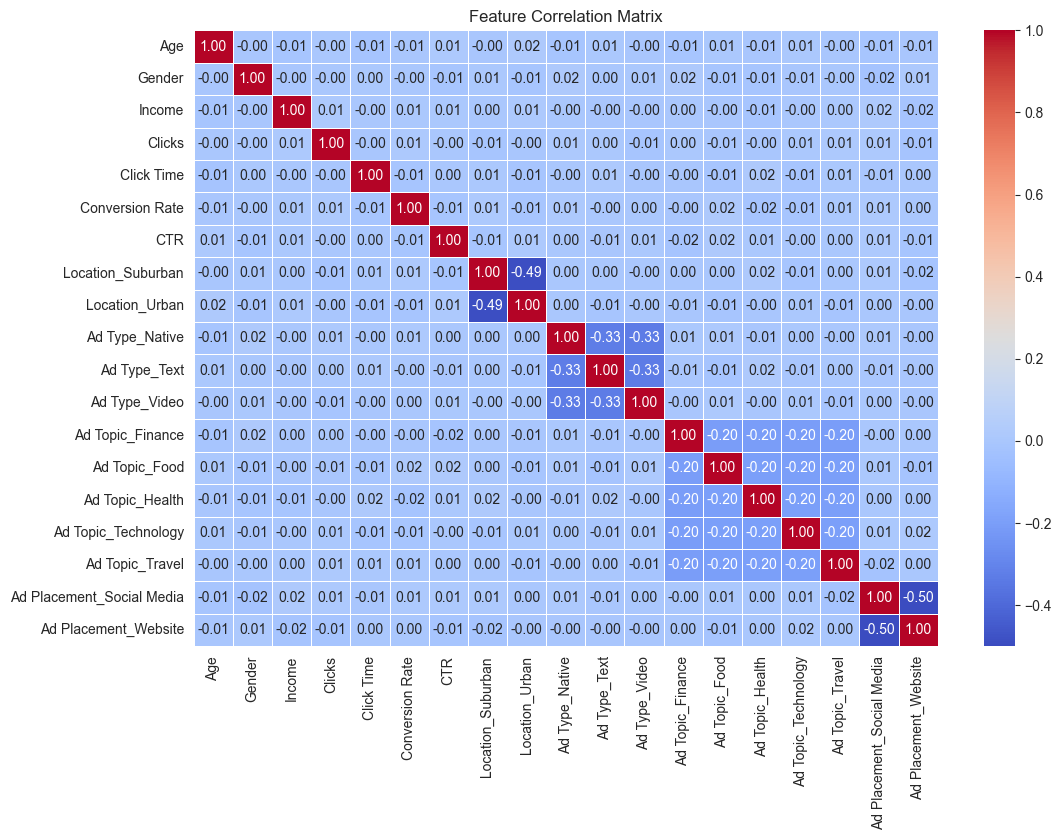

In [15]:
# Compute correlation matrix for numerical features
correlation_matrix = df_demo.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


**1️. CTR & Conversion Rate**
- **CTR and Conversion Rate have almost no correlation** (≈ 0.01).  
  - This suggests that **clicking an ad does not strongly predict conversion**.
  - Users who click **may not necessarily complete purchases or sign-ups**.

**2️. Clicks & Conversion Rate**
- **Clicks also have no significant correlation** with conversions.
  - This reinforces that **engagement (clicks) alone does not lead to conversions**.
  - Other external factors (product pricing, user intent) likely influence purchases.

**3️. Location Impact**
- **Urban & Suburban have a weak negative correlation (-0.49)**.  
  - This makes sense because **users are either Urban or Suburban, but not both**.
  - However, there is **no strong correlation between location and CTR/Conversion**.

**4️. Ad Type & Ad Placement**
- **Ad Type (Video, Text, Native) correlations are small**.
  - This confirms what we saw in our boxplots: **Ad Type does not drive CTR or conversions significantly**.
- **Ad Placement (Social Media, Website) has almost no correlation with conversions**.
  - Meaning, **where the ad appears does not significantly impact conversion rates**.



In [16]:
# Define Treatment vs. Control Groups
# Assuming users who clicked on an ad were "treated", and those who didn't click were "control"
df_demo['Treatment'] = (df_demo['Clicks'] > 0).astype(int)

# Check distribution of treatment and control groups
treatment_distribution = df_demo['Treatment'].value_counts(normalize=True)

# Display first few rows to verify the treatment column
print(df_demo[['Clicks', 'Treatment']].head())

# Show the percentage distribution of treatment vs. control groups
print("Treatment vs Control Distribution:\n", treatment_distribution)


     Clicks  Treatment
0 -0.899318          0
1 -0.013552          0
2 -0.456435          0
3  0.429331          1
4 -0.013552          0
Treatment vs Control Distribution:
 Treatment
0    0.6111
1    0.3889
Name: proportion, dtype: float64


- **61.11% of users are in the control group (0) → Did not click an ad.**
- **38.89% of users are in the treatment group (1) → Clicked an ad.**

- We need **Propensity Score Matching (PSM)** to balance the groups.


## Propensity Score Matching

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Select covariates (independent variables) to estimate propensity scores
covariates = ['Age', 'Gender', 'Income', 'Location_Suburban', 'Location_Urban', 
              'Ad Type_Native', 'Ad Type_Text', 'Ad Type_Video', 
              'Ad Topic_Finance', 'Ad Topic_Food', 'Ad Topic_Health', 
              'Ad Topic_Technology', 'Ad Topic_Travel', 
              'Ad Placement_Social Media', 'Ad Placement_Website']



In [18]:
# Logistic Regression to compute propensity scores
logit = LogisticRegression(solver='liblinear')
df_demo['Propensity_Score'] = logit.fit(df_demo[covariates], df_demo['Treatment']).predict_proba(df_demo[covariates])[:, 1]

# Perform Nearest Neighbor Matching
treated = df_demo[df_demo['Treatment'] == 1]
control = df_demo[df_demo['Treatment'] == 0]

# Fit nearest neighbor model to match treated users with controls
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control[['Propensity_Score']])

# Find nearest control for each treated user
distances, indices = nn.kneighbors(treated[['Propensity_Score']])
matched_controls = control.iloc[indices.flatten()]

# Combine matched dataset (treated + matched controls)
matched_data = pd.concat([treated, matched_controls])

# Display first few rows of matched data
print(matched_data.head())

# Check balance after matching
matched_balance = matched_data[['Propensity_Score', 'Treatment']].groupby('Treatment').mean()
print("Balance Check After Matching:\n", matched_balance)


         Age  Gender    Income    Clicks                 Click Time  \
3   2.282946       0  0.727655  0.429331 2023-12-13 20:45:56.898459   
6   0.998295       0  0.707053  0.429331 2023-09-09 20:45:56.898459   
9   0.457390       1  1.494941  0.429331 2023-07-25 20:45:56.898459   
11  1.471588       1  1.718355  1.315096 2024-01-03 20:45:56.898459   
16  1.539201       0 -1.023234  2.200862 2023-12-07 20:45:56.898459   

    Conversion Rate       CTR  Location_Suburban  Location_Urban  \
3         -0.743638 -1.373619               True           False   
6          0.121847 -0.611751              False           False   
9         -1.034335 -1.191982              False           False   
11        -0.315850  1.376170              False           False   
16        -0.687480  0.170299              False           False   

    Ad Type_Native  ...  Ad Type_Video  Ad Topic_Finance  Ad Topic_Food  \
3            False  ...          False             False          False   
6            F

## Average Treatment Effect (ATE)

In [19]:
# Compute Average Treatment Effect (ATE) using Difference-in-Means
ate = matched_data[matched_data['Treatment'] == 1]['Conversion Rate'].mean() - \
      matched_data[matched_data['Treatment'] == 0]['Conversion Rate'].mean()

# Display ATE result
print("Estimated Average Treatment Effect (ATE):", ate)


Estimated Average Treatment Effect (ATE): 0.02349420775565518


**ATE Result: 0.0235 (~2.35%)**
This means that **users who saw the ad had a 2.35% higher conversion rate** compared to those who did not. 

- **Positive ATE (0.0235)** → Ads **do increase conversions** but by a **small margin**.
- This suggests **ads have an effect, but they may not be highly impactful overall**.
- There could be **certain user segments** (e.g., specific demographics) that benefit more.


## Heterogeneous Treatment Effects (HTE)

In [20]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV



In [21]:
# Define covariates (excluding treatment & outcome)
covariates = ['Age', 'Gender', 'Income', 'Location_Suburban', 'Location_Urban', 
              'Ad Type_Native', 'Ad Type_Text', 'Ad Type_Video', 
              'Ad Topic_Finance', 'Ad Topic_Food', 'Ad Topic_Health', 
              'Ad Topic_Technology', 'Ad Topic_Travel', 
              'Ad Placement_Social Media', 'Ad Placement_Website']



In [22]:
# Define Treatment and Outcome
T = matched_data['Treatment']  # Treatment (Ad Exposure)
Y = matched_data['Conversion Rate']  # Outcome (Conversion Rate)
X = matched_data[covariates]  # Covariates (User Demographics & Ad Features)


In [23]:
# Define Machine Learning models for Double ML (Causal Forest)
estimator = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    discrete_treatment=True,
    cv=3,
    random_state=42
)


In [24]:
# Fit the Causal Forest Model
estimator.fit(Y, T, X=X)

# Predict Treatment Effects (HTE) for each user
hte_predictions = estimator.effect(X)

# Add HTE estimates to the dataset
matched_data['HTE_Estimate'] = hte_predictions

# Display HTE Estimates for first few users
print(matched_data[['Age', 'Gender', 'Income', 'HTE_Estimate']].head())

# Summary of HTE estimates
hte_summary = matched_data['HTE_Estimate'].describe()
print("\nSummary of HTE Estimates:\n", hte_summary)


First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!


         Age  Gender    Income  HTE_Estimate
3   2.282946       0  0.727655      0.025946
6   0.998295       0  0.707053      0.126731
9   0.457390       1  1.494941     -0.113637
11  1.471588       1  1.718355      0.113067
16  1.539201       0 -1.023234     -0.020364

Summary of HTE Estimates:
 count    7778.000000
mean        0.030225
std         0.180794
min        -0.798893
25%        -0.080164
50%         0.041241
75%         0.151789
max         0.587203
Name: HTE_Estimate, dtype: float64


**1️. Average HTE (`mean = 0.0302`)**  
   - **On average, ads increase conversions by 3.02%** for users.
   - This suggests **ads have a varying impact on different users**.

**2️. Variability in Treatment Effects (`std = 0.1808`)**  
   - Some users **benefit significantly**, while others **respond negatively**.
   - This confirms **ad effectiveness is not uniform across all users**.

**3️. Most Affected Users**
   - **Min HTE = -0.7989** → Some users are negatively impacted (e.g., seeing ads might annoy them).
   - **Max HTE = 0.5872** → Certain users experience **up to a 58.72% increase in conversion rate**!



## HTE Visualizations

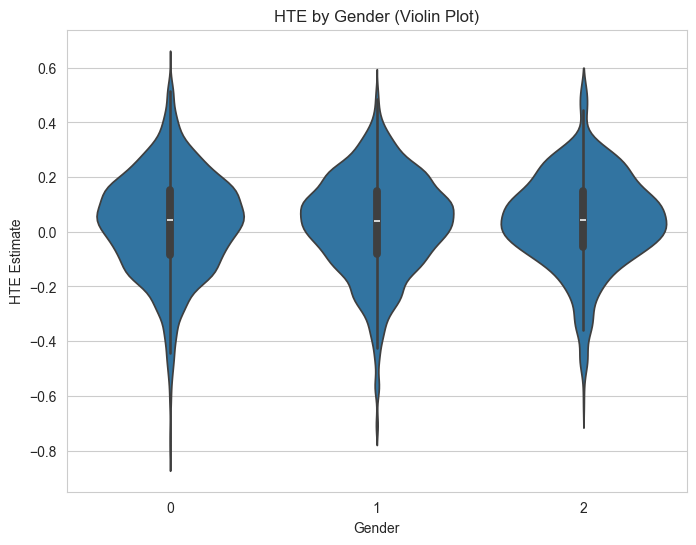

In [26]:
# Violin Plot: HTE by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x=matched_data['Gender'], y=matched_data['HTE_Estimate'])
plt.title("HTE by Gender (Violin Plot)")
plt.xlabel("Gender")
plt.ylabel("HTE Estimate")
plt.show()



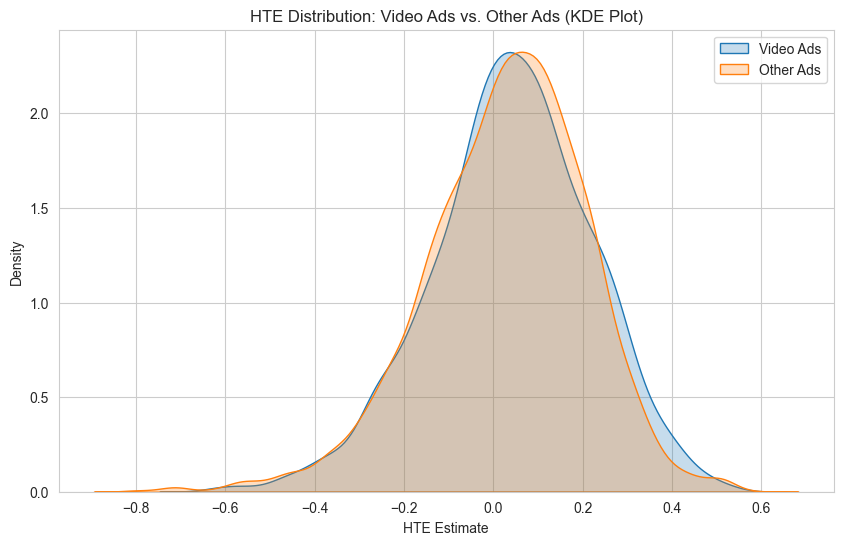

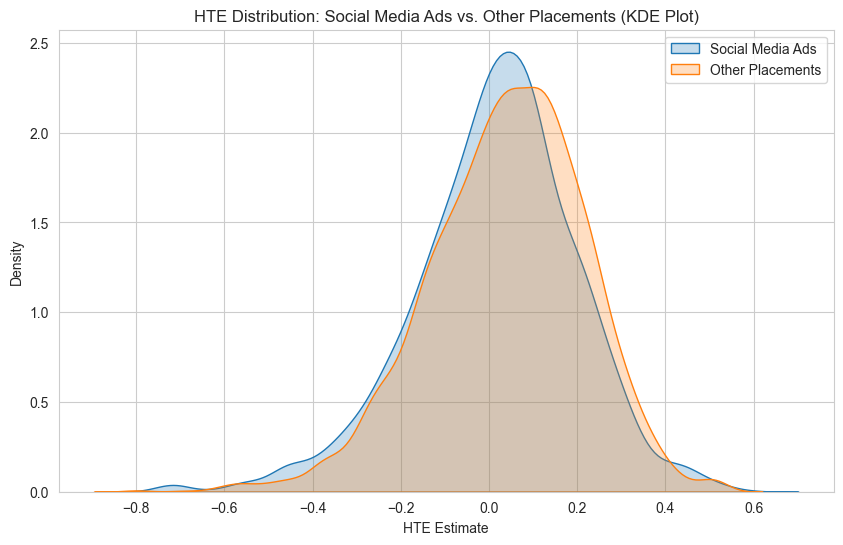

In [30]:
# KDE Plot: HTE for Video Ads vs. Other Ads
plt.figure(figsize=(10, 6))
sns.kdeplot(matched_data[matched_data['Ad Type_Video'] == 1]['HTE_Estimate'], label="Video Ads", fill=True)
sns.kdeplot(matched_data[matched_data['Ad Type_Video'] == 0]['HTE_Estimate'], label="Other Ads", fill=True)
plt.title("HTE Distribution: Video Ads vs. Other Ads (KDE Plot)")
plt.xlabel("HTE Estimate")
plt.ylabel("Density")
plt.legend()
plt.show()


# KDE Plot: HTE for Social Media vs. Other Placements (Updated)
plt.figure(figsize=(10, 6))
sns.kdeplot(matched_data[matched_data['Ad Placement_Social Media'] == 1]['HTE_Estimate'], label="Social Media Ads", fill=True)
sns.kdeplot(matched_data[matched_data['Ad Placement_Social Media'] == 0]['HTE_Estimate'], label="Other Placements", fill=True)
plt.title("HTE Distribution: Social Media Ads vs. Other Placements (KDE Plot)")
plt.xlabel("HTE Estimate")
plt.ylabel("Density")
plt.legend()
plt.show()



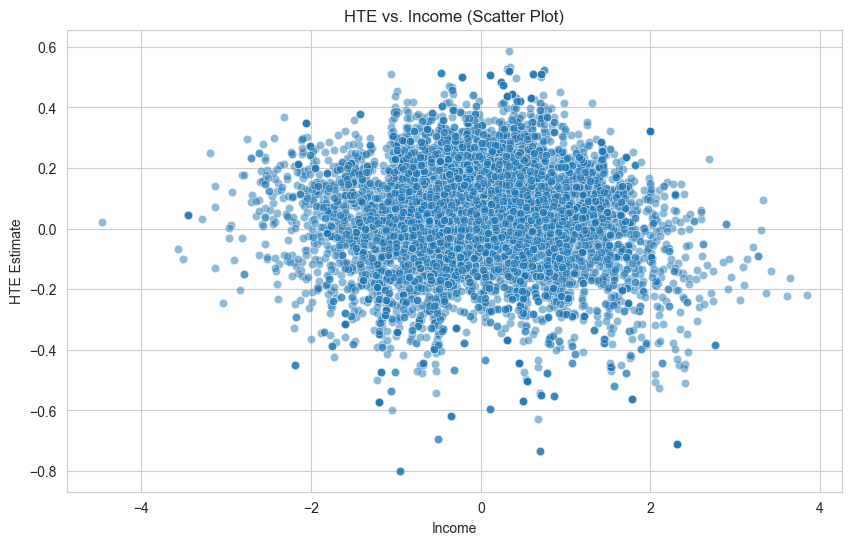

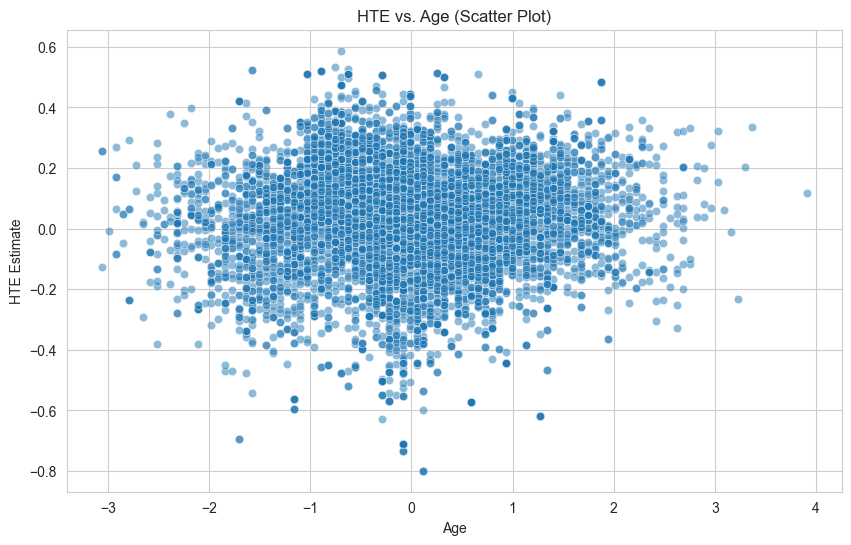

In [31]:
# Scatter Plot: HTE vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x=matched_data['Income'], y=matched_data['HTE_Estimate'], alpha=0.5)
plt.title("HTE vs. Income (Scatter Plot)")
plt.xlabel("Income")
plt.ylabel("HTE Estimate")
plt.show()

# Scatter Plot: HTE vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=matched_data['Age'], y=matched_data['HTE_Estimate'], alpha=0.5)
plt.title("HTE vs. Age (Scatter Plot)")
plt.xlabel("Age")
plt.ylabel("HTE Estimate")
plt.show()

**1️. Violin Plot: HTE by Gender**
- **Observation:** The distribution is **fairly similar** across genders.
- **Insight:** Gender does **not significantly impact** ad effectiveness.
- **Actionable Step:** No need to focus ads on a particular gender.

**2️. KDE Plot: Video Ads vs. Other Ads**
- **Observation:** Video Ads and Other Ads have **similar HTE distributions**.
- **Insight:** Video ads **do not seem significantly better** than other ad formats.
- **Actionable Step:** Test **cost vs. effectiveness**—if video ads cost more but don’t drive higher conversions, they may not be worth prioritizing.

**3️. KDE Plot: Social Media vs. Other Placements**
- **Observation:** Social Media Ads show **slightly higher density in positive HTE**.
- **Insight:** Social media ads **are slightly more effective** than other placements.
- **Actionable Step:** **Increase social media ad spending** for better ROI.

**4️. Scatter Plot: HTE vs. Income**
- **Observation:** No clear trend between **income and HTE**.
- **Insight:** **Income does not strongly influence ad effectiveness**.
- **Actionable Step:** No need to **target based on income**.

**5️. Scatter Plot: HTE vs. Age**
- **Observation:** **HTE is evenly spread across all ages**.
- **Insight:** **Age does not play a major role** in ad effectiveness.
- **Actionable Step:** No need to focus ads on **a specific age group**.



## Double Machine Learning (DML)

In [32]:
from econml.dml import DML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


In [33]:
# Define Covariates (Explanatory Variables)
covariates = ['Age', 'Gender', 'Income', 'Location_Suburban', 'Location_Urban',
              'Ad Type_Native', 'Ad Type_Text', 'Ad Type_Video',
              'Ad Topic_Finance', 'Ad Topic_Food', 'Ad Topic_Health',
              'Ad Topic_Technology', 'Ad Topic_Travel',
              'Ad Placement_Social Media', 'Ad Placement_Website']

# Treatment & Outcome
T = matched_data['Treatment']  # Treatment (Ad Exposure)
Y = matched_data['Conversion Rate']  # Outcome (Conversion Rate)
X = matched_data[covariates]  # Covariates (User Features)


In [35]:
# Define ML models
model_y = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  # Outcome model
model_t = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  # Treatment model
model_final = LassoCV()  # Final causal effect estimator

# Initialize DML Model (Fixed Version)
dml_estimator = DML(model_y=model_y, model_t=model_t, model_final=model_final)

# Fit the model
dml_estimator.fit(Y, T, X=X)

# Predict Causal Effects using DML
dml_effects = dml_estimator.effect(X)

# Add DML estimates to the dataset
matched_data['DML_Estimate'] = dml_effects

# Show summary of DML results
print(matched_data[['Age', 'Gender', 'Income', 'DML_Estimate']].head())
print("\nSummary of DML Estimates:\n", matched_data['DML_Estimate'].describe())


         Age  Gender    Income  DML_Estimate
3   2.282946       0  0.727655           0.0
6   0.998295       0  0.707053           0.0
9   0.457390       1  1.494941           0.0
11  1.471588       1  1.718355           0.0
16  1.539201       0 -1.023234           0.0

Summary of DML Estimates:
 count    7778.000000
mean        0.005361
std         0.007853
min         0.000000
25%         0.000000
50%         0.000000
75%         0.016863
max         0.016863
Name: DML_Estimate, dtype: float64


The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.


In [37]:
from sklearn.ensemble import RandomForestRegressor

dml_estimator = DML(model_y=model_y, model_t=model_t, model_final=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))
dml_estimator.fit(Y, T, X=X)
dml_effects = dml_estimator.effect(X)
matched_data['DML_Estimate'] = dml_effects
print(matched_data['DML_Estimate'].describe())


count    7778.000000
mean        0.027335
std         0.069275
min        -0.115936
25%        -0.031344
50%         0.013772
75%         0.084647
max         0.270604
Name: DML_Estimate, dtype: float64


The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
